In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,NaN,0.2
2,4.7,3.2,1.3,NaN
3,NaN,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,NaN,2.3
146,NaN,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	14
float64		column 3	21
float64		column 4	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,136.000000,136.000000,129.000000,143.000000
mean,5.855147,3.063971,3.779845,1.211888
std,0.792915,0.423858,1.713338,0.758379
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

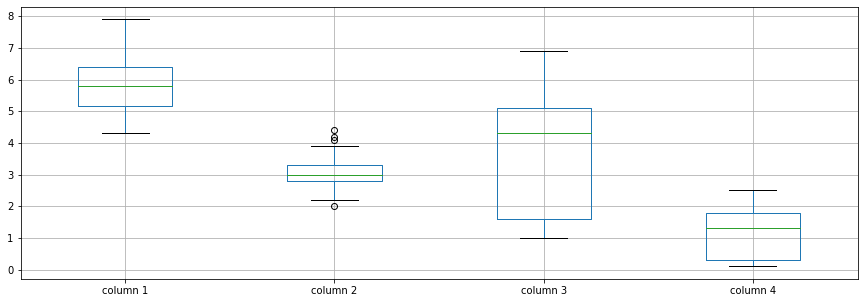

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.855147
column 2    3.063971
column 3    3.779845
column 4    1.211888
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.090919,0.870396,0.818686
column 2,-0.090919,1.000000,-0.483786,-0.362757
column 3,0.870396,-0.483786,1.000000,0.961225
column 4,0.818686,-0.362757,0.961225,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+97,4+97+97,4+97+97+97,4+97+97+97+97,4+97+97+97+97+97,4+97+97+97+97,4+97+97+97,4+97+97,4+97,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.008757485283745
Epoch: 1 , loss: 12.959501478407118
Epoch: 2 , loss: 12.972865316602919
Epoch: 3 , loss: 12.91421201494005
Epoch: 4 , loss: 13.07465680440267
Epoch: 5 , loss: 12.845907105339897
Epoch: 6 , loss: 12.905510266621908
Epoch: 7 , loss: 12.914763344658745
Epoch: 8 , loss: 12.881884786817762
Epoch: 9 , loss: 12.61438634660509
Epoch: 10 , loss: 12.295858595106337
Epoch: 11 , loss: 11.916844156053331
Epoch: 12 , loss: 11.544004228379992
Epoch: 13 , loss: 11.754089249504936
Epoch: 14 , loss: 11.560102462768555
Epoch: 15 , loss: 11.636744711134169
Epoch: 16 , loss: 11.427152845594618
Epoch: 17 , loss: 11.572850757175022
Epoch: 18 , loss: 11.332764625549316
Epoch: 19 , loss: 11.507719251844618
Epoch: 20 , loss: 10.917403115166557
Epoch: 21 , loss: 11.008448176913792
Epoch: 22 , loss: 10.74974536895752
Epoch: 23 , loss: 11.073048379686144
Epoch: 24 , loss: 11.105609893798828
Epoch: 25 , loss: 10.8

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,-1.355444,0.000000
2,0.000000,0.0,0.000000,-0.123417
3,-4.554949,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000
...,...,...,...,...
145,0.000000,0.0,-1.853699,0.000000
146,-5.793371,0.0,0.000000,0.000000
147,0.000000,0.0,0.000000,0.000000
148,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.88297102397148, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.23432829645048908

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.400000,0.200000
1,4.900000,3.0,0.044556,0.200000
2,4.700000,3.2,1.300000,0.076583
3,0.045051,3.1,1.500000,0.200000
4,5.000000,3.6,1.400000,0.200000
...,...,...,...,...
145,6.700000,3.0,3.346301,2.300000
146,0.506629,2.5,5.000000,1.900000
147,6.500000,3.0,5.200000,2.000000
148,6.200000,3.4,5.400000,2.300000


In [20]:
imputations[-1].to_excel("Iris_NN_10(imp).xlsx", index=False, header=False)